1. Loại trang sức (gem) nào được sử dụng trong các sản phẩm?
2. Kim loại (metal) nào được sử dụng nhiều nhất?
3. Giá trung bình của đồ trang sức phân theo kim loại là bao nhiêu?
4. Giá trung bình của mỗi kim loại là bao nhiêu?
5. Có bao nhiêu trang sức (gem) trong mỗi loại sản phẩm?
6. Giá trung bình của trang sức trong mỗi loại sản phẩm?
7. Top loại trang sức đắt tiền nhất?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cartier = pd.read_csv('/content/cartier_catalog.csv')

In [4]:
cartier.head()

,ref,categorie,title,price,tags,description,image
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png


#1. Loại trang sức (gem) nào được sử dụng trong các sản phẩm?

In [6]:
cartier.tags.value_counts()

,count
tags,
"white gold, diamonds",121
"pink gold, diamonds",100
"yellow gold, diamonds",60
yellow gold,45
pink gold,38
...,...
"pink gold, black lacquer, onyx, tsavorite garnets",1
"white gold, lacquer, tsavorite garnets, onyx",1
"pink gold, emeralds, obsidians, diamonds",1


In [8]:
cartier['str_split'] = cartier['tags'].str.split(',')

In [9]:
cartier.head(10)

,ref,categorie,title,price,tags,description,image,str_split
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png,[yellow gold]
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png,[platinum]
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png,[pink gold]
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png,[white gold]
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png,[yellow gold]
5,B4085200,rings,Love wedding band,1070.0,pink gold,"Love wedding band, 18K rose gold. Width: 3.6mm.",/content/dam/rcq/car/58/73/14/587314.png,[pink gold]
6,B4085100,rings,Love wedding band,1140.0,white gold,"Love wedding band, 18K white gold. Width: 3.6mm.",/content/dam/rcq/car/59/22/21/592221.png,[white gold]
7,B4085300,rings,Love wedding band,2380.0,platinum,"Love wedding band, 950/1000 platinum. Width: 3...",/content/dam/rcq/car/62/40/10/624010.png,[platinum]
8,B4032400,rings,"Love ring, 3 diamonds",3500.0,"yellow gold, diamonds","Love ring, 18K yellow gold, set with 3 brillia...",/content/dam/rcq/car/58/47/16/584716.png,"[yellow gold, diamonds]"
9,B4087500,rings,"Love ring, 3 diamonds",3500.0,"pink gold, diamonds","Love ring, 18K rose gold, set with 3 brilliant...",/content/dam/rcq/car/58/39/70/583970.png,"[pink gold, diamonds]"


In [10]:
def tag_spliter(dataframe, col_name, delimiter, metal, first_gem, second_gem, third_gem, fourth_gem):
    dataframe['str_split'] = dataframe[col_name].str.split(delimiter)
    dataframe[metal] = dataframe['str_split'].str.get(0).str.strip()
    dataframe[first_gem] = dataframe['str_split'].str.get(1).str.strip()
    dataframe[second_gem] = dataframe['str_split'].str.get(2).str.strip()
    dataframe[third_gem] = dataframe['str_split'].str.get(3).str.strip()
    dataframe[fourth_gem] = dataframe['str_split'].str.get(4).str.strip()
    dataframe.fillna(0, inplace=True)
    del dataframe['str_split']

In [11]:
tag_spliter(cartier, 'tags', ',', 'metal', 'first_gem', 'second_gem', 'third_gem', 'fourth_gem')

In [12]:
cartier.head()

,ref,categorie,title,price,tags,description,image,metal,first_gem,second_gem,third_gem,fourth_gem
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png,yellow gold,0,0,0,0
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png,platinum,0,0,0,0
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png,pink gold,0,0,0,0
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png,white gold,0,0,0,0
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png,yellow gold,0,0,0,0


In [15]:
cartier.drop(['ref', 'image', 'tags', 'title', 'description'], axis=1, inplace=True)

In [19]:
gems = pd.concat([cartier['first_gem'], cartier['second_gem'], cartier['third_gem'], cartier['fourth_gem']], axis=0)

In [21]:
gems.head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,diamonds
9,diamonds


In [34]:
gems_value = gems.value_counts()[1:].to_frame()

In [35]:
gems_value.reset_index(inplace=True)

In [36]:
gems_value.columns = ['gem_type', 'count']

In [37]:
gems_value

,gem_type,count
0,diamonds,431
1,onyx,90
2,emeralds,70
3,diamond,61
4,yellow gold,37
5,pink gold,37
6,tsavorite garnets,35
7,sapphires,19
8,ceramic,17
9,lacquer,11


<ipython-input-74-4a50448c1006>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gem_type', y='count', data=gems_value, palette='Set2')


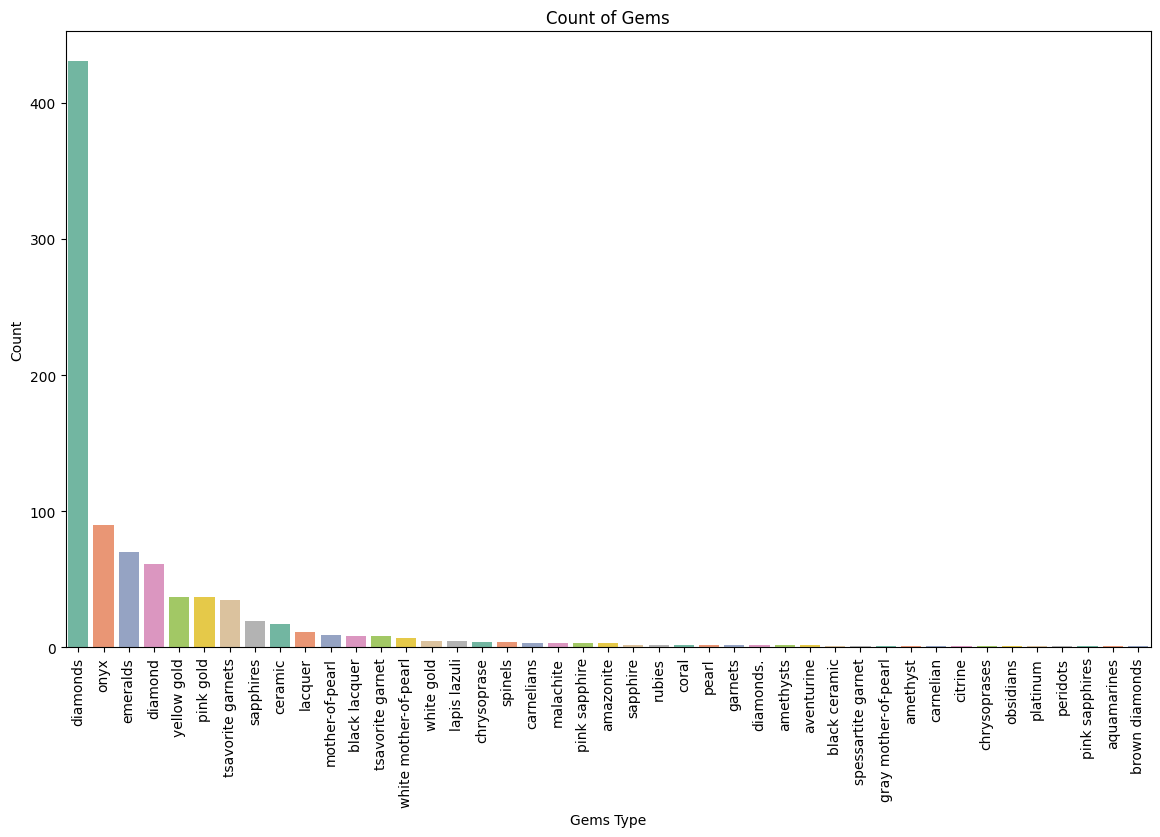

In [74]:
# Plotting with Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='gem_type', y='count', data=gems_value, palette='Set2')
plt.title('Count of Gems')
plt.xlabel('Gems Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotating the x labels for better readability
plt.show()

#2. Kim loại (metal) nào được sử dụng nhiều nhất?

In [55]:
cartier_category_metal = cartier.groupby('categorie')['metal'].value_counts().to_frame()

In [56]:
cartier_category_metal.reset_index(inplace=True)

In [57]:
cartier_category_metal.columns = ['categorie', 'metal', 'count']

In [58]:
cartier_category_metal

,categorie,metal,count
0,bracelets,white gold,61
1,bracelets,pink gold,52
2,bracelets,yellow gold,43
3,bracelets,platinum,4
4,earrings,white gold,54
5,earrings,pink gold,34
6,earrings,yellow gold,28
7,earrings,platinum,2
8,necklaces,white gold,66
9,necklaces,pink gold,49


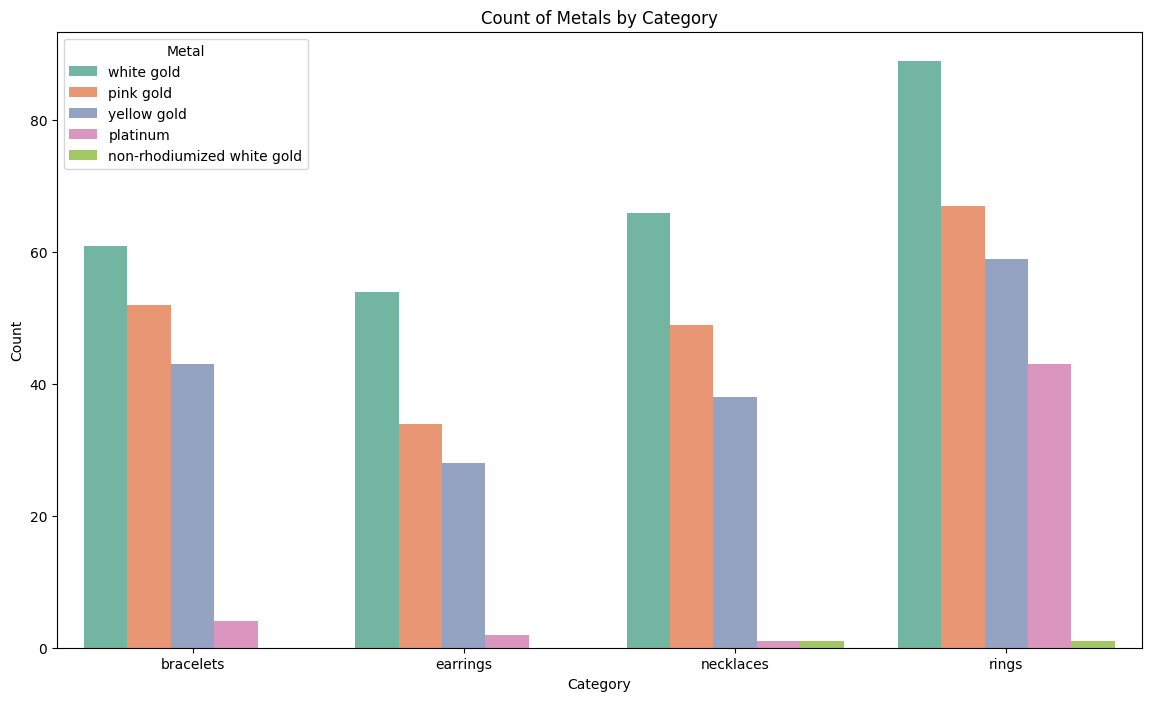

In [59]:
# Plotting with Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='categorie', y='count', hue='metal', data=cartier_category_metal, palette='Set2')
plt.title('Count of Metals by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Metal')
plt.show()

#3. Giá trung bình của đồ trang sức phân theo kim loại là bao nhiêu?

In [61]:
cartier_gb1 = cartier.groupby(['categorie','metal'])['price'].mean().round(2).to_frame()

In [62]:
cartier_gb1

price
categorie metal                                
bracelets pink gold                    28741.92
          platinum                    209250.00
          white gold                   50363.28
          yellow gold                  39504.42
earrings  pink gold                     8146.47
          platinum                    117000.00
          white gold                   36350.56
          yellow gold                  11328.21
necklaces non-rhodiumized white gold   19700.00
          pink gold                    18284.49
          platinum                    331000.00
          white gold                   44466.82
          yellow gold                  29280.79
rings     non-rhodiumized white gold   21400.00
          pink gold                     5160.60
          platinum                     18656.28
          white gold                   19224.83
          yellow gold                  11110.51

In [63]:
cartier_gb1 = cartier_gb1.reset_index()

In [64]:
cartier_gb1

,categorie,metal,price
0,bracelets,pink gold,28741.92
1,bracelets,platinum,209250.00
2,bracelets,white gold,50363.28
3,bracelets,yellow gold,39504.42
4,earrings,pink gold,8146.47
5,earrings,platinum,117000.00
6,earrings,white gold,36350.56
7,earrings,yellow gold,11328.21
8,necklaces,non-rhodiumized white gold,19700.00
9,necklaces,pink gold,18284.49


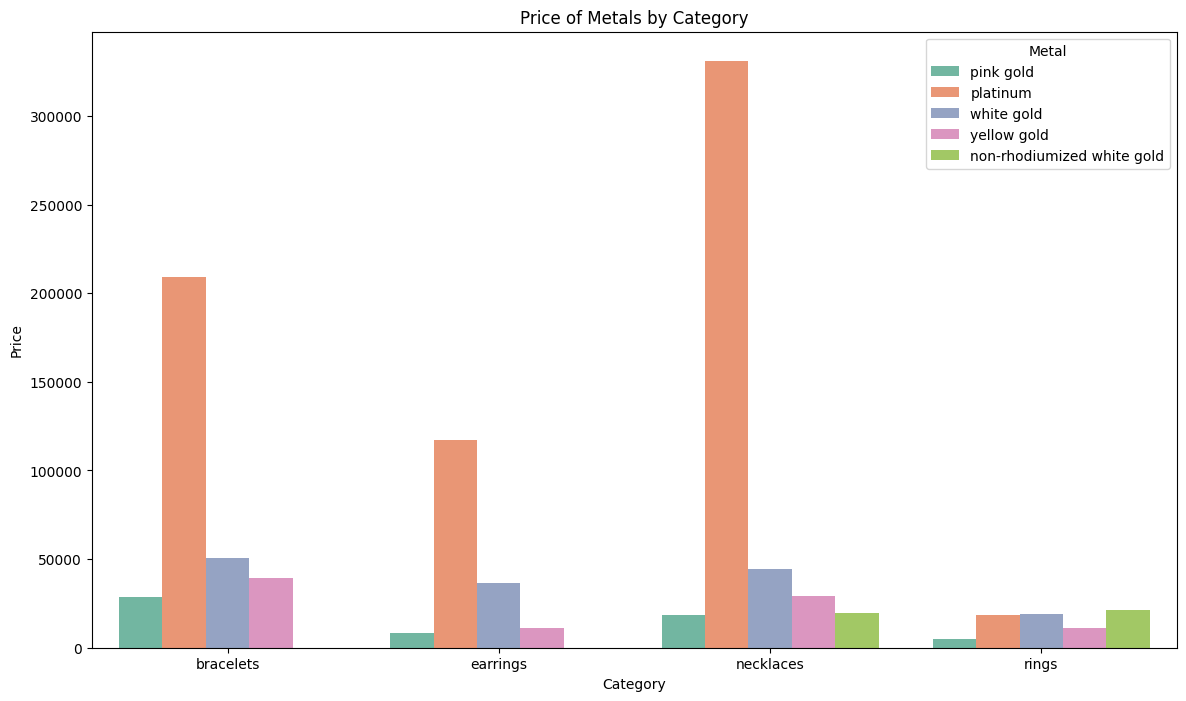

In [75]:
# Plotting with Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='categorie', y='price', hue='metal', data=cartier_gb1, palette='Set2')
plt.title('Price of Metals by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.legend(title='Metal')
plt.show()

#4. Giá trung bình của mỗi kim loại là bao nhiêu?

In [68]:
cartier_gb2 = cartier.groupby('metal')['price'].mean().round(2).to_frame()

In [69]:
cartier_gb2.reset_index(inplace=True)

In [70]:
cartier_gb2

,metal,price
0,non-rhodiumized white gold,20550.00
1,pink gold,14917.13
2,platinum,44084.40
3,white gold,35855.22
4,yellow gold,22524.23


<ipython-input-76-579540c752d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='metal', y='price', data=cartier_gb2, palette='Set2')


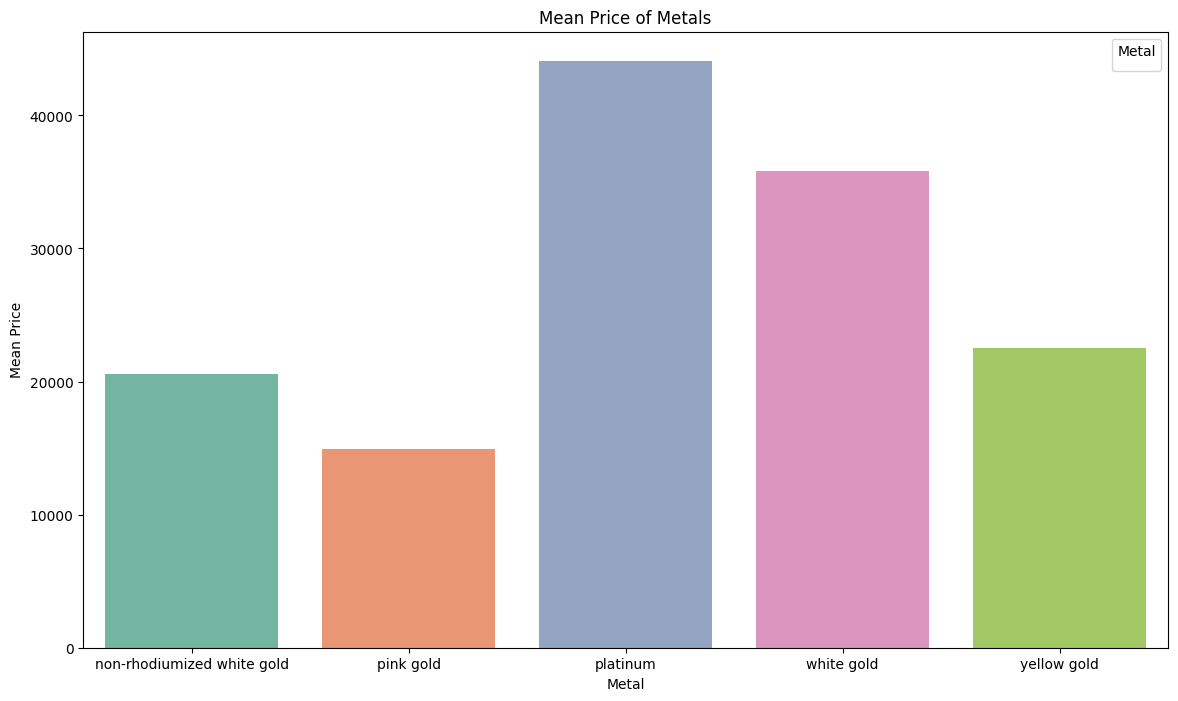

In [76]:
# Plotting with Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='metal', y='price', data=cartier_gb2, palette='Set2')
plt.title('Mean Price of Metals')
plt.xlabel('Metal')
plt.ylabel('Mean Price')
plt.legend(title='Metal')
plt.show()

#5. Có bao nhiêu trang sức (gem) trong mỗi loại sản phẩm?

In [100]:
cartier_gb3 = cartier.groupby('categorie')['first_gem'].value_counts().to_frame()

In [101]:
cartier_gb3.reset_index(inplace=True)

In [102]:
cartier_gb3

,categorie,first_gem,count
0,bracelets,diamonds,68
1,bracelets,0,32
2,bracelets,emeralds,15
3,bracelets,diamond,10
4,bracelets,tsavorite garnets,7
...,...,...,...
68,rings,pink gold,1
69,rings,chrysoprase,1
70,rings,spinels,1
71,rings,coral,1


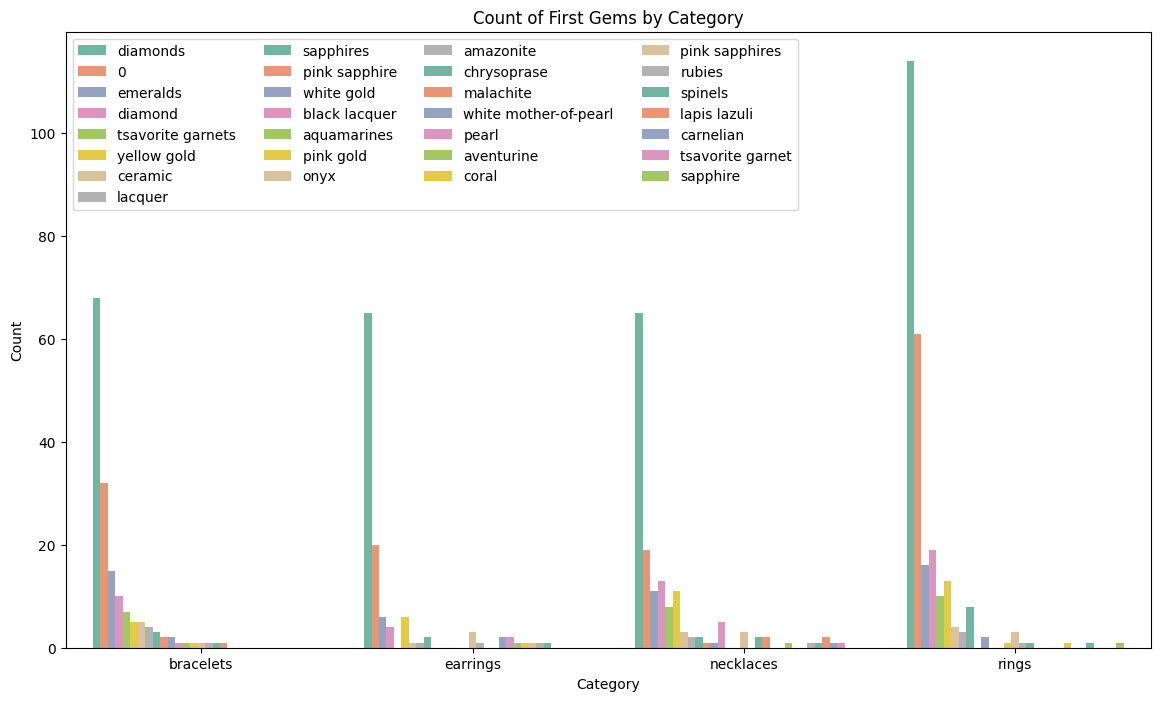

In [105]:
# Plotting with Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='categorie', y='count', hue='first_gem', data=cartier_gb3, palette='Set2')
plt.title('Count of First Gems by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(ncol = 4, loc = 'upper left')
plt.show()

#6. Giá trung bình của trang sức trong mỗi loại sản phẩm?


In [107]:
cartier_gb1_gem = cartier.groupby(['categorie','first_gem'])['price'].mean().round(2).to_frame()
cartier_gb1_gem.reset_index(inplace=True)

In [108]:
cartier_gb1_gem = cartier_gb1_gem[cartier_gb1_gem['first_gem'] != 0]
cartier_gb1_gem

,categorie,first_gem,price
1,bracelets,amazonite,56000.00
2,bracelets,aquamarines,8250.00
3,bracelets,black lacquer,35000.00
4,bracelets,ceramic,13258.00
5,bracelets,chrysoprase,68500.00
...,...,...,...
68,rings,sapphires,68157.50
69,rings,spinels,18500.00
70,rings,tsavorite garnets,8890.00
71,rings,white gold,4975.00


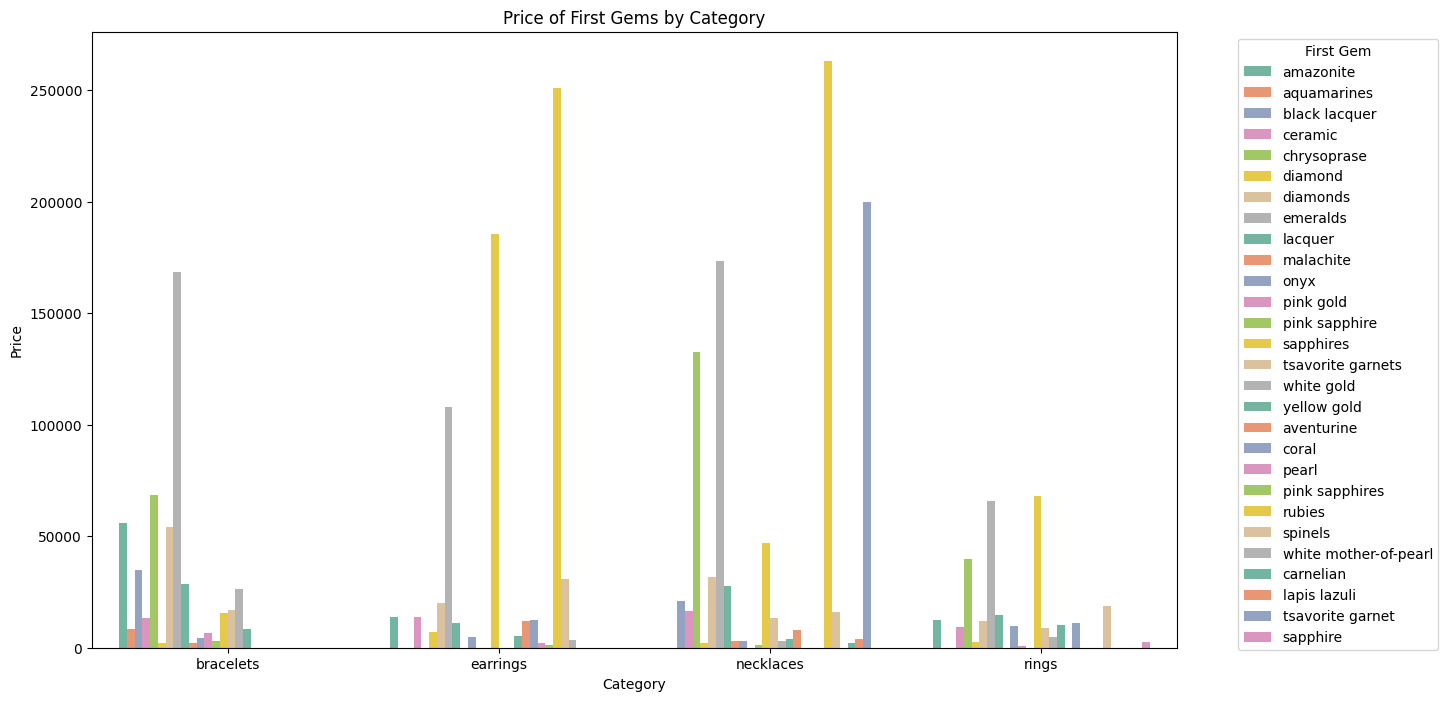

In [109]:
# Plotting with Seaborn
plt.figure(figsize=(14, 8))
sns.barplot(x='categorie', y='price', hue='first_gem', data=cartier_gb1_gem, palette='Set2')
plt.title('Price of First Gems by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.legend(title='First Gem', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#7. Top loại trang sức đắt tiền nhất?

In [111]:
cartier_gb2_gem = cartier.groupby(['first_gem'])['price'].mean().round(2).to_frame()
cartier_gb2_gem.reset_index(inplace=True)

In [112]:
cartier_gb2_gem.sort_values(by='price', ascending=False, inplace=True)

In [113]:
cartier_gb2_gem

,first_gem,price
20,rubies,257000.00
24,tsavorite garnet,200000.00
11,emeralds,127830.21
7,chrysoprase,93490.00
22,sapphires,70420.67
1,amazonite,27400.00
10,diamonds,26849.17
4,black lacquer,23390.00
12,lacquer,22575.00
23,spinels,21800.00
